This Notebook documents the differences when completing the tree sequences produced by the original and updated variants of the single_sweep function in msprime's algorithms.py. The updated function is designed to work by pre-computing a sweep trajectory based on a forwards-in-time simulation that we produced. The msprime software is then used to "complete" the simulation by using the output of the previous forwards simulation as the basis for a backwards-in-time coalescent simulation. The first few blocks will excute the new code. The last few blocks will execute the old code.

Here we will define the method that "completes" the simulations.

In [1]:
import msprime
import numpy as np
import sys, argparse
from algorithms import add_simulator_arguments
import tskit

def complete(file):
    Ne = 20000
    L = 100 
    num_reps = 100
    init_ts = tskit.load(file)

    sweep_model = msprime.SweepGenicSelection(
        position=(L // 2) - 1,  # middle of chrom
        start_frequency=1.0 / (2 * Ne),
        end_frequency=1-(1.0 / (2 * Ne)),
        s=0.1,
        dt=1e-6,
    )

    reps = msprime.sim_ancestry(
        model=[sweep_model, msprime.StandardCoalescent()],
        initial_state=init_ts,
        population_size=Ne,
        recombination_rate=0.01,
        sequence_length=L,
        num_replicates=num_reps,
    )

    wins = np.linspace(0, L, 21)
    mids = (wins[1:] + wins[:-1]) / 2
    diversity = np.zeros((num_reps, mids.shape[0]))
    for j, ts in enumerate(reps):
        diversity[j] = ts.diversity(windows=wins, mode="branch")

    #This block plots the result.
    from matplotlib import pyplot as plt

    plt.plot(mids, diversity.mean(axis=0), label="Simulations")
    plt.axhline(4 * Ne, linestyle=":", label=r'Neutral expectation')
    plt.ylabel(r'Branch $\pi$');
    plt.xlabel('Position (bp)')
    plt.legend();
    plt.show()

Execute the new simulation.

/Users/agushin/Desktop/msprime/msprime_selection/msprime/ancestry.py:904: TimeUnitsMismatchWarning: The initial_state has time_units=unknown but time is measured in generations in msprime. This may lead to significant discrepancies between the timescales. If you wish to suppress this warning, you can use, e.g., warnings.simplefilter('ignore', msprime.TimeUnitsMismatchWarning)
  warnings.warn(message, TimeUnitsMismatchWarning)
/Users/agushin/Desktop/msprime/msprime_selection/msprime/demography.py:1178: IncompletePopulationMetadataWarning: No metadata schema present in population table, not recording metadata
  warnings.warn(


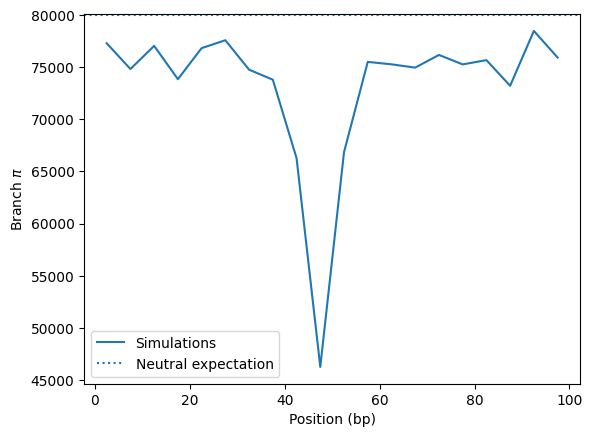

In [2]:
sys.argv = ['algorithms.py', "100", "out.txt", "--model", "single_sweep", "--forwards", "1", "20000", "0.2", "0", "1000000", "19", "-r", "0.01", "--time-slice", "0.00005"]
parser = argparse.ArgumentParser()
add_simulator_arguments(parser)
args = parser.parse_args()

from algorithms import run_simulate

run_simulate(args)
complete("out.txt")

The next section will execute the identical simulation using the original algorithms.py functionality.

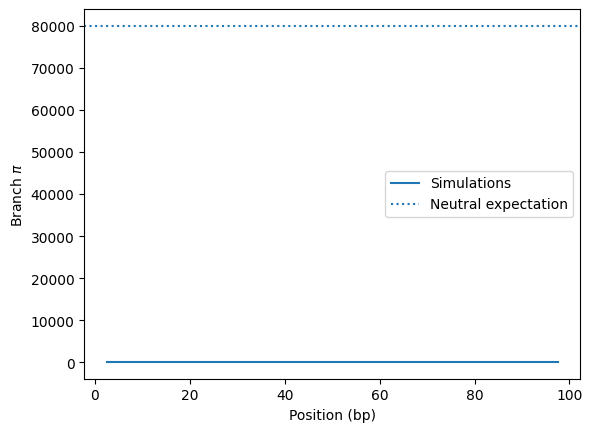

In [3]:
sys.argv = ['algorithms.py', "100", "out2.txt", "--model", "single_sweep", "--trajectory", "0.000025", "0.999975", "8000", "-r", "0.01"]
parser = argparse.ArgumentParser()
add_simulator_arguments(parser)
args = parser.parse_args()

run_simulate(args)
complete("out2.txt")